In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
#file import
drive.mount('/content/drive')
path = '/content/drive/My Drive/HW7Q4.csv'
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Create X and Y
X = df.iloc[:, :-1].values  # First two columns as features X
y = df.iloc[:, -1].values   # Last column as labels y

PART A

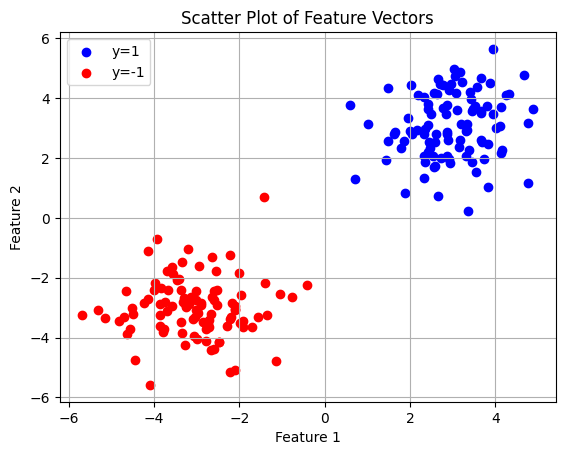

In [ ]:
#scatter plot of the data
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='y=1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='y=-1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Scatter Plot of Feature Vectors')
plt.grid()
plt.show()


In [ ]:
# Initial parameters
w = np.array([-1.0, 1.0])  # Initial weight vector
mu = 1e-4  # Step size
max_iters = 1000  # Number of iterations
n = len(y)  # Number of samples

# Storage for plotting
classification_errors = []
margins = []

PART B and CI/CII

In [ ]:
# Gradient Descent Algorithm
for iteration in range(max_iters):
    # Compute gradient
    grad = w.copy()
    for i in range(n):
        if 1 - y[i] * np.dot(X[i], w) > 0:
            grad -= y[i] * X[i]

    # Update weights
    w = w - mu * grad

    # Part (c.i): Compute classification error
    predictions = np.sign(np.dot(X, w))
    classification_error = np.mean(predictions != y)
    classification_errors.append(classification_error)

    # Part (c.ii): Compute margin
    margin = 2 / np.linalg.norm(w)
    margins.append(margin)


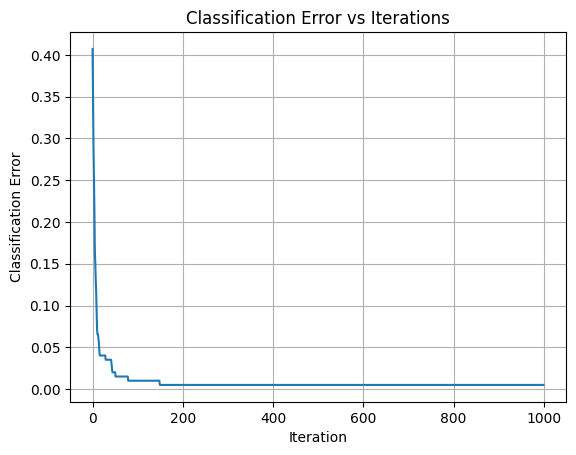

In [ ]:
# Plot classification error vs iterations
plt.plot(classification_errors)
plt.xlabel('Iteration')
plt.ylabel('Classification Error')
plt.title('Classification Error vs Iterations')
plt.grid()
plt.show()

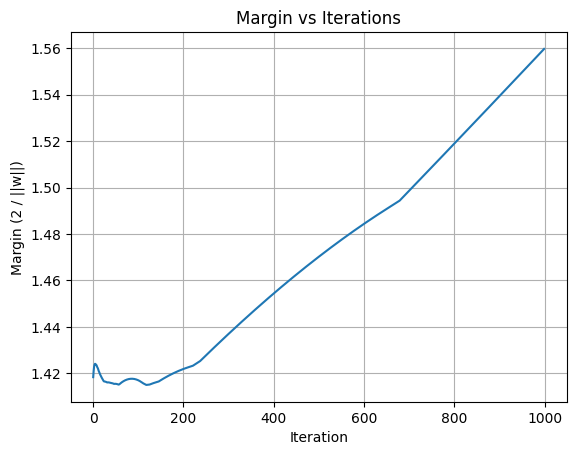

In [ ]:
# Plot margin vs iterations
plt.plot(margins)
plt.xlabel('Iteration')
plt.ylabel('Margin (2 / ||w||)')
plt.title('Margin vs Iterations')
plt.grid()
plt.show()

PART D

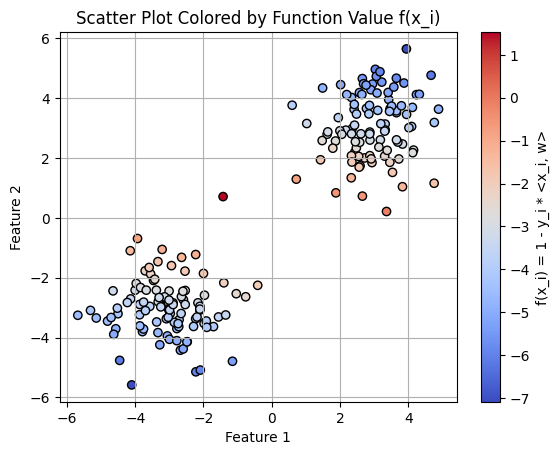

In [ ]:
#scatter plot colored by function value f(x_i)
function_values = 1 - y * np.dot(X, w)
plt.scatter(X[:, 0], X[:, 1], c=function_values, cmap='coolwarm', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot Colored by Function Value f(x_i)')
plt.colorbar(label='f(x_i) = 1 - y_i * <x_i, w>')
plt.grid()
plt.show()
